In [36]:
from nsepy import get_history
from datetime import date
import os
import pandas as pd
import streamlit as st
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator,DayLocator, MONDAY
import mplfinance as mpf
from matplotlib import gridspec
import numpy as np
import matplotlib.ticker as ticker
import yfinance as yf 
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
import datetime
import neptune
from sklearn.preprocessing import StandardScaler

In [37]:
stock_names=pd.read_csv("Equity.csv")

In [62]:
stock_names.head(10)

,Security Code,Issuer Name,Security Id,Security Name,Status,Group,Face Value,ISIN No,Industry,Instrument,Sector Name,Industry New Name,Igroup Name,ISubgroup Name
500002,ABB India Limited,ABB,ABB India Limited,Active,A,2.0,INE117A01022,Heavy Electrical Equipment,Equity,Industrials,Capital Goods,Electrical Equipment,Heavy Electrical Equipment,NaN
500003,Aegis Logistics Ltd.,AEGISLOG,AEGIS LOGISTICS LTD.,Active,A,1.0,INE208C01025,Trading - Gas,Equity,Energy,"Oil, Gas & Consumable Fuels",Gas,Trading - Gas,NaN
500008,Amara Raja Batteries Ltd,AMARAJABAT,AMARA RAJA BATTERIES LTD.,Active,A,1.0,INE885A01032,Auto Components & Equipments,Equity,Consumer Discretionary,Automobile and Auto Components,Auto Components,Auto Components & Equipments,NaN
500009,"Ambalal Sarabhai Enterprise Ltd.,",AMBALALSA,AMBALAL SARABHAI ENTERPRISES LTD.,Active,X,10.0,INE432A01017,Pharmaceuticals,Equity,Healthcare,Healthcare,Pharmaceuticals & Biotechnology,Pharmaceuticals,NaN
500010,Housing Development Finance Corp.Lt,HDFC,HOUSING DEVELOPMENT FINANCE CORP.LTD.,Active,A,2.0,INE001A01036,Housing Finance Company,Equity,Financial Services,Financial Services,Finance,Housing Finance Company,NaN
500012,"Andhra Petrochemicals Ltd.,",ANDHRAPET,ANDHRA PETROCHEMICALS LTD.,Active,X,10.0,INE714B01016,Commodity Chemicals,Equity,Commodities,Chemicals,Chemicals & Petrochemicals,Commodity Chemicals,NaN
500013,Ansal Properties & Infrastructure Ltd.,ANSALAPI,ANSAL PROPERTIES & INFRASTRUCTURE LTD.,Active,T,5.0,INE436A01026,Residential- Commercial Projects,Equity,Consumer Discretionary,Realty,Realty,"Residential, Commercial Projects",NaN
500014,UTIQUE ENTERPRISES LIMITED,UTIQUE,Utique Enterprises Ltd,Active,X,10.0,INE096A01010,Precious Metals,Equity,Commodities,Metals & Mining,Non - Ferrous Metals,Precious Metals,NaN
500016,Aruna Hotels Ltd.,ARUNAHTEL,ARUNA HOTELS LTD.,Active,X,10.0,INE957C01019,Hotels & Resorts,Equity,Consumer Discretionary,Consumer Services,Leisure Services,Hotels & Resorts,NaN
500020,"Bombay Dyeing & Mfg. Co. Ltd.,",BOMDYEING,BOMBAY DYEING & MFG.CO.LTD.,Active,B,2.0,INE032A01023,Other Textile Products,Equity,Consumer Discretionary,Textiles,Textiles & Apparels,Other Textile Products,NaN


# 1.0 Data read from yfinance

## 1.1 yfinance

In [84]:
stock = 'HDFCBANK'

In [85]:
mondays = WeekdayLocator(MONDAY)      
alldays = DayLocator()
months = mdates.MonthLocator()
years = mdates.YearLocator()
yearFormatter=   DateFormatter('%Y')       
weekFormatter = DateFormatter('%b %Y')  
dayFormatter = DateFormatter('%d-%b-%Y')  
#df = get_history(symbol=stock, start=start, end=end)
stock_name = yf.Ticker(stock+'.NS')
df = stock_name.history(period='max')
print(df.shape)
df.head()

(7022, 7)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,2.402506,2.402506,2.319251,2.362860,350000,0.0,0.0
1996-01-02 00:00:00+05:30,2.362861,2.398542,2.339074,2.358896,412000,0.0,0.0
1996-01-03 00:00:00+05:30,2.358896,2.374754,2.339074,2.366825,284000,0.0,0.0
1996-01-04 00:00:00+05:30,2.366825,2.362860,2.331144,2.350966,282000,0.0,0.0
1996-01-05 00:00:00+05:30,2.350966,2.362860,2.339073,2.347002,189000,0.0,0.0


In [86]:
df["Date"] = pd.to_datetime(df.index)
df.reset_index(drop=True, inplace=True)
df.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,2.402506,2.402506,2.319251,2.362860,350000,0.0,0.0,1996-01-01 00:00:00+05:30
1,2.362861,2.398542,2.339074,2.358896,412000,0.0,0.0,1996-01-02 00:00:00+05:30


In [112]:
df.shape

(1000, 8)

## 1.2 Train test split

In [113]:
#Taking recent data
df = df.iloc[-1000:]

# Take the last 25 rows for the test dataset
test = df.iloc[-25:]

# The rest of the rows will be used for the training dataset
train = df.iloc[:-25]

train = train[["Date", "Close"]]
test = test[["Date", "Close"]]

In [87]:
# # Take the last 25 rows for the test dataset
# test = df.tail(25)

# # The rest of the rows will be used for the training dataset
# train = df.iloc[:-25,:]

# test_ratio = 0.2
# training_ratio = 1 - test_ratio

# train_size = int(training_ratio * len(df))
# test_size = int(test_ratio * len(df))
# print(f"train_size: {train_size}")
# print(f"test_size: {test_size}")

# train = df[:train_size][["Date", "Close"]]
# test = df[train_size:][["Date", "Close"]]

train_size: 5617
test_size: 1404


In [114]:
training_set = train.iloc[:, 1:2].values

# 2.0 Model pre-processing

## 2.1 Scaling

In [115]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

## 2.2 Creating a data structure with 60 timesteps and 1 output

In [116]:
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

## 2.3 Reshaping

In [117]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# 3.0 Building and Training the RNN

### Importing the Keras libraries and packages

In [118]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [119]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [120]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [121]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [122]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [123]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [124]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [125]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [126]:
%%time

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
29/29 [==============================] - 19s 102ms/step - loss: 0.0812
Epoch 2/100
29/29 [==============================] - 3s 105ms/step - loss: 0.0137
Epoch 3/100
29/29 [==============================] - 3s 101ms/step - loss: 0.0110
Epoch 4/100
29/29 [==============================] - 3s 100ms/step - loss: 0.0108
Epoch 5/100
29/29 [==============================] - 3s 102ms/step - loss: 0.0099
Epoch 6/100
29/29 [==============================] - 3s 101ms/step - loss: 0.0097
Epoch 7/100
29/29 [==============================] - 3s 102ms/step - loss: 0.0093
Epoch 8/100
29/29 [==============================] - 3s 106ms/step - loss: 0.0085
Epoch 9/100
29/29 [==============================] - 3s 105ms/step - loss: 0.0078
Epoch 10/100
29/29 [==============================] - 3s 111ms/step - loss: 0.0084
Epoch 11/100
29/29 [==============================] - 3s 113ms/step - loss: 0.0084
Epoch 12/100
29/29 [==============================] - 3s 105ms/step - loss: 0.0078
Epoch 13/100

29/29 [==============================] - 3s 102ms/step - loss: 0.0027
Epoch 100/100
29/29 [==============================] - 3s 113ms/step - loss: 0.0025
Wall time: 5min 18s


## 4.0 Making the predictions and visualising the results

### 4.1 Getting the real stock price

In [127]:
dataset_train = train
dataset_test = test
real_stock_price = test.iloc[:, 1:2].values

### 4.2 Getting the predicted stock price

In [128]:
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 60 + len(real_stock_price)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 3s 3s/step


### 4.3 Visualising the results

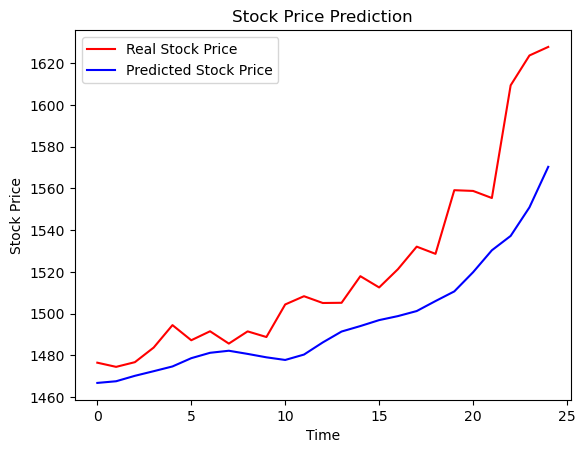

In [129]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()